## Análisis estilográfico de autores


**Equipo:** ***Knights of Cydonia***


* Avalos Gonzalez Joel Sebastian 
* Castañon Maldonado Carlos Emilio 
* Reyes Ramos Luz María 
* Sánchez Castro Gustavo 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

### Data:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#desconocidos = pd.read_csv('/content/dataautoresdesconocidos.csv')
desconocidos = pd.read_csv('/content/drive/MyDrive/dataautoresdesconocidos.csv')
conocidos = pd.read_csv('/content/drive/MyDrive/dataautoresconocidos.csv')

In [ ]:
desconocidos = pd.merge(conocidos, desconocidos, left_on='unknown-text', right_on='author-unknown')

In [ ]:
desconocidos = desconocidos.drop('unknown-text', axis=1)

In [ ]:
desconocidos

,true-author,author-unknown,text
0,candidate00046,unknown00001,China and Britain agreed on Wednesday to relea...
1,candidate00001,unknown00002,The Federal Reserve may not be taking adequate...
2,candidate00009,unknown00003,Britain's motor industry reported 1996 car reg...
3,candidate00019,unknown00004,When the former Czechoslovak diplomat Josef Ko...
4,candidate00012,unknown00005,China is building a network of major toll high...
...,...,...,...
2495,candidate00018,unknown02496,Britain's big banks look set to raise profits ...
2496,candidate00047,unknown02497,After two years of hype and euphoria about the...
2497,candidate00002,unknown02498,Czech annual average consumer inflation eased ...
2498,candidate00037,unknown02499,"Kellogg Co, whose profits for 1996 are under p..."


In [ ]:
def get_autores(id = None):
    if not id:
        id = np.random.randint(0,2500)
    return id, desconocidos['text'][id]

In [ ]:
## Ejemplo de los registros ()
id, autores_sample = get_autores()
print(id, ' : ', autores_sample)

1582  :  The board of directors of WMX Technologies Inc. Wednesday rallied around its Chief Executive Phillip Rooney following a direct attack on his leadership by a major stockholder.
An investment group led by financier George Soros called Tuesday for Rooney's ouster and proposed a slate of nominees for the board of the largest U.S. garbage-hauling company.
In response, the WMX board said it "unanimously reaffirmed its support for Phillip B. Rooney and his leadership of the company during his seven months as chief executive officer."
The exchange did little but aggravate the acrimonious struggle involving WMX, Soros and other large shareholders.
"I don't think they could really escalate the animosity any higher than it already is," said James Kelleher, industry analyst at the Argus Research firm in New York.
The New York-based Soros group and other investors, including the Lens Fund in Washington, D.C., have been pressuring WMX to improve its performance for months.
WMX, based in Oak

## Procesamiento de Texto:

In [ ]:
import string
import nltk
nltk.download('stopwords')
nltk.download(['punkt','averaged_perceptron_tagger','wordnet'])

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from nltk.corpus.reader.wordnet import NOUN, VERB, ADV, ADJ

morphy_tag = {
    'JJ' : ADJ,
    'JJR' : ADJ,
    'JJS' : ADJ,
    'VB' : VERB,
    'VBD' : VERB,
    'VBG' : VERB,
    'VBN' : VERB,
    'VBP' : VERB,
    'VBZ' : VERB,
    'RB' : ADV,
    'RBR' : ADV,
    'RBS' : ADV
}

def doc_a_tokens(doc):
  tagged = pos_tag(word_tokenize(doc.lower()))
  lemmatizer = WordNetLemmatizer()
  tokens = []
  for p,t in tagged:
    tokens.append(lemmatizer.lemmatize(p, pos=morphy_tag.get(t, NOUN)))

  return tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import re

def clean_text(data):
    # Convertir &amp; a &
    data = data.replace('&amp;', '&')
    # Eliminar caracteres especiales y signos de puntuación
    data = re.sub(r'[^\w\s]', '', data)
    # Convertir a minúsculas
    data = data.lower()
    # Eliminar espacios adicionales
    data = re.sub(r'\s+', ' ', data.strip())
    return data

def remove_punctuations(data):
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r'',data)
    return data

def remove_url(data):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


In [ ]:
desconocidos = desconocidos.copy()

desconocidos['text_limp'] = desconocidos['text'].apply(lambda z: remove_punctuations(z))
desconocidos['text_limp'] = desconocidos['text'].apply(lambda z: remove_url(z))
desconocidos['text_limp'] = desconocidos['text'].apply(lambda z: remove_emoji(z))
desconocidos['text_limp'] = desconocidos['text'].apply(lambda z: clean_text(z))


In [ ]:
### Sirve para separar las palabras, dependera de como meterla al modelo (es ideal para el modelado de topicos) creare una nueva columna por si se requiere!

palabras_vacias = nltk.corpus.stopwords.words('english')

def quita_palabras_vacias(texto):
  texto = texto.split()
  texto_limpio = [palabra for palabra in texto if palabra not in palabras_vacias ]

  return texto_limpio

desconocidos['text_limp2'] = desconocidos['text_limp'].apply(lambda z: quita_palabras_vacias(z))

In [ ]:
desconocidos

,true-author,author-unknown,text,text_limp,text_limp2
0,candidate00046,unknown00001,China and Britain agreed on Wednesday to relea...,china and britain agreed on wednesday to relea...,"[china, britain, agreed, wednesday, release, l..."
1,candidate00001,unknown00002,The Federal Reserve may not be taking adequate...,the federal reserve may not be taking adequate...,"[federal, reserve, may, taking, adequate, prec..."
2,candidate00009,unknown00003,Britain's motor industry reported 1996 car reg...,britains motor industry reported 1996 car regi...,"[britains, motor, industry, reported, 1996, ca..."
3,candidate00019,unknown00004,When the former Czechoslovak diplomat Josef Ko...,when the former czechoslovak diplomat josef ko...,"[former, czechoslovak, diplomat, josef, korbel..."
4,candidate00012,unknown00005,China is building a network of major toll high...,china is building a network of major toll high...,"[china, building, network, major, toll, highwa..."
...,...,...,...,...,...
2495,candidate00018,unknown02496,Britain's big banks look set to raise profits ...,britains big banks look set to raise profits b...,"[britains, big, banks, look, set, raise, profi..."
2496,candidate00047,unknown02497,After two years of hype and euphoria about the...,after two years of hype and euphoria about the...,"[two, years, hype, euphoria, internet, sweepin..."
2497,candidate00002,unknown02498,Czech annual average consumer inflation eased ...,czech annual average consumer inflation eased ...,"[czech, annual, average, consumer, inflation, ..."
2498,candidate00037,unknown02499,"Kellogg Co, whose profits for 1996 are under p...",kellogg co whose profits for 1996 are under pr...,"[kellogg, co, whose, profits, 1996, pressure, ..."


In [ ]:
def get_autores2(id = None):
    if not id:
        id = np.random.randint(0,2500)
    return id, desconocidos['text_limp'][id]

In [ ]:
## Ejemplo de los registros ()
id, autores_sample2 = get_autores2()
print(id, ' : ', autores_sample2)

1856  :  att corp said monday its firstquarter profits fell 17 percent trimmed by competition in longdistance services and investments in new businesses and warned second quarter results might be weak as well meanwhile bellsouth corp a strong performer among regional telephone companies said its operating earnings rose 11 percent due to a rise in the number of customer lines and strong growth in its wireless operations att said it earned 113 billion or 69 cents a share on revenues of 1305 billion down from net income of 136 billion or 85 cents a share on revenues of 1285 billion in the first quarter of 1996 atts earnings per share for the first quarter were in line with wall streets expectations based on previous guidance the company had provided financial analysts results are where we expected them to be as we implement our strategy chairman robert allen said in a statement in a conference call monday att also warned that its second quarter results were likely to be weaker than the fi

## Preparacion para el perceptron multicapa

In [ ]:
stem = []
for line in desconocidos['text_limp2']:
  consultas = []
  for c in line:
    tokens = doc_a_tokens(c)
    consultas.append(' '.join(tokens))
  stem.append(consultas)

In [ ]:
stem[0:10] ##Ejemplo del stem

[['china',
  'britain',
  'agree',
  'wednesday',
  'release',
  'large',
  'tract',
  'land',
  'hong',
  'kong',
  'development',
  'accord',
  'fail',
  'impress',
  'expert',
  'say',
  'must',
  'do',
  'address',
  'territory',
  'housing',
  'woe',
  'housing',
  'expert',
  'analyst',
  'criticise',
  'amount',
  'target',
  'residential',
  'use',
  'small',
  'unlikely',
  'reassure',
  'many',
  'hong',
  'kongs',
  '64',
  'million',
  'population',
  'able',
  'afford',
  'buy',
  'home',
  'term',
  'agreement',
  'total',
  '9876',
  'hectare',
  '244',
  'acre',
  'land',
  'dispose',
  'june',
  '30',
  '1227',
  'hectare',
  '297',
  'acre',
  'residential',
  'use',
  'rest',
  'commercial',
  'industrial',
  'us',
  '7019',
  'hectare',
  '1734',
  'acre',
  'alone',
  'container',
  'terminal',
  'dont',
  'think',
  'anything',
  'major',
  'dont',
  'think',
  'significant',
  'unless',
  'say',
  'release',
  'substantially',
  'land',
  'say',
  'next',
  'five

In [ ]:
detokenized_doc = []
for i in range(len(stem)):
    t = ' '.join(stem[i])
    detokenized_doc.append(t)

In [ ]:
desconocidos['text_limp2'] = detokenized_doc

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english',
                            max_features= 10000, # máximo número de términos
                            max_df = 0.5,
                            smooth_idf=True)

X = vectorizer.fit_transform(desconocidos['text_limp2'])


## Perceptron multicapa para los 3 optimizadores:

In [ ]:
y = desconocidos['true-author']
# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista de solvers
solvers = ['lbfgs', 'sgd', 'adam']
accuracies = []

for solver in solvers:
    # Creación y entrenamiento del modelo de perceptrón multicapa con el solver actual
    model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1000, activation='relu', solver=solver, random_state=1)
    model.fit(X_train, y_train)

    # Evaluación del modelo
    accuracy = model.score(X_test, y_test)
    accuracies.append(accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


<ipython-input-31-984037ea469b>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


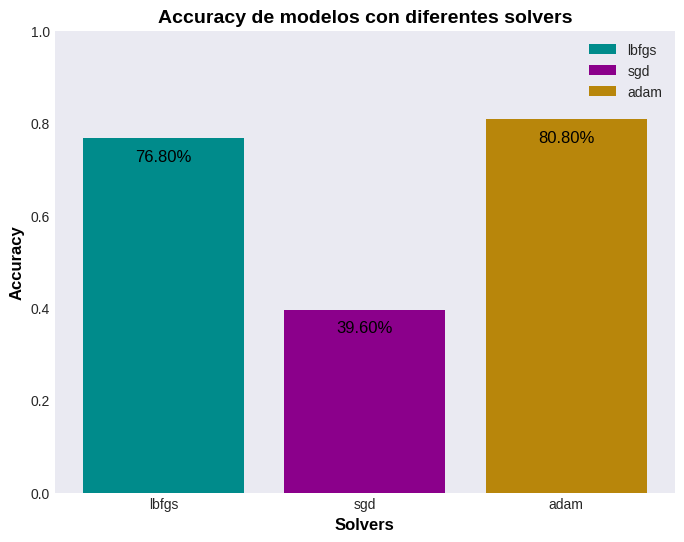

In [ ]:
plt.figure(figsize=(8, 6))
colors = ['#008B8B', '#8B008B', '#B8860B']
bars = plt.bar(solvers, accuracies, color=colors)
# Modificar estilo del texto
plt.xlabel('Solvers', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold', color='black')
plt.title('Accuracy de modelos con diferentes solvers', fontsize=14, fontweight='bold', color='black')
bars[2].set_label('adam')
bars[0].set_label('lbfgs')
bars[1].set_label('sgd')
plt.ylim(0, 1)  # Establecer límites en el eje y de 0 a 1 para la precisión
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{accuracy * 100:.2f}%', ha='center', color='black', fontsize=12)
plt.grid(False)
plt.style.use('seaborn-dark')
plt.legend()
plt.show()


## Optimizador Adam, mejor precision del modelo.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

y = desconocidos['true-author']
# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación y entrenamiento del modelo de perceptrón multicapa
model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1000, activation='relu', solver='adam', random_state=1)
model.fit(X_train, y_train)

# Evaluación del modelo
accuracy = model.score(X_test, y_test)
print(f'Precisión del modelo: {accuracy}')

Precisión del modelo: 0.808


In [ ]:
# Predicciones en el conjunto de prueba
predicciones = model.predict(X_test)

# Comparar las predicciones con las etiquetas reales
from sklearn.metrics import classification_report, confusion_matrix

print("Matriz de Confusión:")
print(confusion_matrix(y_test, predicciones))

print("\nReporte de Clasificación:")
print(classification_report(y_test, predicciones))

Matriz de Confusión:
[[14  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0  3 ...  0  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  2]]

Reporte de Clasificación:
                precision    recall  f1-score   support

candidate00001       1.00      0.93      0.97        15
candidate00002       0.75      1.00      0.86         9
candidate00003       0.43      0.50      0.46         6
candidate00004       0.50      0.50      0.50         6
candidate00005       0.75      0.75      0.75        12
candidate00006       0.69      0.75      0.72        12
candidate00007       1.00      0.91      0.95        11
candidate00008       0.67      0.86      0.75         7
candidate00009       0.89      1.00      0.94         8
candidate00010       0.79      0.85      0.81        13
candidate00011       0.93      1.00      0.96        13
candidate00012       0.73      0.85      0.79        13
candidate00013       0.92      1.00      0.96        12
candidate00

### Clasificaciones correctas

In [ ]:
correct_predictions = 0

# Obtener la cantidad de filas en X_test
num_samples = X_test.shape[0]

for idx in range(num_samples):
    # Obtener la predicción del modelo para el texto en X_test
    predicted_author = model.predict(X_test[idx])[0]
    true_author = y_test.iloc[idx]  # Obtener el autor verdadero del texto en y_test

    # Comprobar si la predicción coincide con el autor verdadero
    if predicted_author == true_author:
        texto = desconocidos['text'].iloc[idx]  # Obtener el texto original
        print(f'Texto original:\n{texto}\nAutor verdadero: {true_author}\nAutor predicho: {predicted_author}\n')
        correct_predictions += 1

print(f'Textos clasificados correctamente: {correct_predictions}')



Se han truncado las últimas 5000 líneas del flujo de salida.
Walt Disney Co.'s agreement to buy into billionaire Paul Allen's Starwave Corp. will mean little change for the online company's 300 employees, Chief Executive Officer Mike Slade said Thursday.
In an interview, Slade said Starwave would continue producing its nine Internet sites including the hugely popular ESPNet SportZone as well as a new ABC News site that will go online this month.
He said the long-expected announcement by Disney represented a natural evolution for Starwave, which has become one of the Internet's early success stories by focusing on sports and entertainment and teaming with well-known "brand names."
"What's really important is the big traditional media company and the Internet company get their strategic and economic interests completely aligned, and they are," Slade said. "These relationships are always complicated, but everyone's working for the exact same goal."
Disney and Starwave did not provide fina

### Clasificaciones por autor en especifico

In [ ]:
target_author = 'candidate00001'  # Autor específico que quieres verificar

for idx in range(num_samples):
    predicted_author = model.predict(X_test[idx])[0]
    true_author = y_test.iloc[idx]

    # Comprobar si el autor verdadero coincide con el autor objetivo
    if true_author == target_author:
        texto = desconocidos['text'].iloc[idx]
        print(f'Texto original:\n{texto}\nAutor verdadero: {true_author}\nAutor predicho: {predicted_author}\n')


Texto original:
Australia's anti-monopolies watchdog, examining claims of collusion against the four major banks, has asked them to explain why they all cut their mortgage rates by the same amount within hours of each other.
Australian Competition and Consumer Commission (ACCC) Chairman Allan Fels said it was unusual that the banks would all move so quickly to cut their rates by the same amount.
"We don't claim to have evidence of collusion. What we are doing is seeking an explanation from the banks," Fels said in a radio interview broadcast on Monday.
National Australia Bank, Australia and New Zealand Banking Group Ltd, Commonwealth Bank of Australia and Westpac Banking Corp all cut their standard variable mortgage rates by 0.35 percent to 7.2 percent on Friday, hours after the Reserve Bank cut official rates by 0.5 percent to 5.5 percent.
Government and opposition politicians and consumer groups have since suggested the banks colluded to ensure they did not pass all of the official r

In [ ]:
target_author = 'candidate00021'  # Autor específico que quieres verificar

for idx in range(num_samples):
    predicted_author = model.predict(X_test[idx])[0]
    true_author = y_test.iloc[idx]

    # Comprobar si el autor verdadero coincide con el autor objetivo
    if true_author == target_author:
        texto = desconocidos['text'].iloc[idx]
        print(f'Texto original:\n{texto}\nAutor verdadero: {true_author}\nAutor predicho: {predicted_author}\n')

Texto original:
China is building a network of major toll highways to supplement its overloaded railway system, and plans to float stock for many of the roads to fund the expansion, companies and analysts said on Monday.
But some brokers questioned the decision to use equity to finance the highway construction programme, saying it would make more sense to raise money by issuing debt.
Chinese officials estimate the country will need around $65 billion for highway construction in the next five years but funding shortfalls are expected to be as large 15 to 25 percent of the total.
China's first international-standard highways only started appeared at the beginning of this decade, but by the end of 1996, the country had 3,258 km of express highway.
There are plans to add a further 900 km in 1997, almost all of it toll road.
Two of the China highways have already listed shares on stock exchanges with more still to come.
The successful Hong Kong listing last November of Anhui Expressway, whi

In [ ]:
target_author = 'candidate00003'  # Autor específico que quieres verificar

for idx in range(num_samples):
    predicted_author = model.predict(X_test[idx])[0]
    true_author = y_test.iloc[idx]

    # Comprobar si el autor verdadero coincide con el autor objetivo
    if true_author == target_author:
        texto = desconocidos['text'].iloc[idx]
        print(f'Texto original:\n{texto}\nAutor verdadero: {true_author}\nAutor predicho: {predicted_author}\n')

Texto original:
South Korea went on alert on Monday for possible attack by the rival North, but said it wanted talks to defuse rising tensions as a high-level Pyongyang defector spent a sixth day stranded in Seoul's embassy in Beijing.
The defection of the most senior official ever to betray his Stalinist homeland was just one of a maze of problems troubling Pyongyang -- beset by an imploding economy, food shortages caused by two years of floods and talk of a power struggle.
Senior North Korean official Hwang Jang-yop turned 74 on Monday with no sign of progress to celebrate in his appeal for political asylum in the South and he remained marooned in Seoul's heavily-guarded consulate office in Beijing.
South Korea braced for possible attacks by Pyongyang as the Cold War crisis escalated, but said confrontation over the defector holed up in Seoul's embassy in Beijing would not scuttle its efforts for detente.
Another prominent defector, Li Il-nam, a nephew of North Korean leader Kim Jong

In [ ]:
target_author = 'candidate00015'  # Autor específico que quieres verificar

for idx in range(num_samples):
    predicted_author = model.predict(X_test[idx])[0]
    true_author = y_test.iloc[idx]

    # Comprobar si el autor verdadero coincide con el autor objetivo
    if true_author == target_author:
        texto = desconocidos['text'].iloc[idx]
        print(f'Texto original:\n{texto}\nAutor verdadero: {true_author}\nAutor predicho: {predicted_author}\n')

Texto original:
Pub-to-hotels group Greenalls Plc is seeing a strong level of Christmas bookings and consumer confidence is picking up, managing director Peter Daresbury said in an interview.
"Christmas bookings are looking very good and there seems to be a strong level of consumer confidence, although the snow and the fog has not been wonderful for the business," he said.
Christmas is a critical period for hotel, pub and restaurant companies operating in Britain and mainland Europe with as much as 20 percent of their annual turnover generated in December.  
Greenalls, owners of the 21-strong De Vere Hotels chain, 2,360 pubs and 470 off-licenses, earlier reported a 47.9 percent rise in pre-tax, pre-exceptional profits to 148.7 million in the year ended September 27. Greenalls has seen improved hotel occupancy and conference business as the corporate sector turned more buoyant and people took more leisure breaks in the year, said Daresbury.
De Vere Hotels revenue per available room rose